NN 2 layers

1. Dataset

In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.datasets import make_blobs, make_circles # type: ignore

In [2]:
from utilities import *

In [3]:
X_train, y_train, X_test, y_test = load_data()

In [4]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

In [5]:
print(X_train_reshape.shape)
print(y_train.shape)

(1000, 4096)
(1000, 1)


In [6]:
print(X_test_reshape.shape)
print(y_test.shape)

(200, 4096)
(200, 1)


In [7]:
X_train_reshape = X_train_reshape.T
y_train = y_train.T
X_test_reshape = X_test_reshape.T
y_test = y_test.T

m_train = 300
m_test = 80
X_train_reshape = X_train_reshape[:, :m_train]
X_test_reshape = X_test_reshape[:, :m_test]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print(X_train_reshape.shape)
print(y_train.shape)

print(X_test_reshape.shape)
print(y_test.shape)

(4096, 300)
(1, 300)
(4096, 80)
(1, 80)


2. Fonctions du modèle

In [8]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.rand(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.rand(n2, 1)

    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }

    return parametres

In [9]:
def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1' : A1,
        'A2' : A2
    }

    return activations

In [10]:
def back_propagation(X, y, activations, parametres):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

    return gradients

In [11]:
def update(gradients, parametres, learning_rate):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1 
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2 
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    
    return parametres

In [12]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [13]:
def visualisation(X, y, params):
  fig, ax = plt.subplots()
  ax.scatter(X[0, :], X[1, :], c=y, cmap='summer', s=50)
  x0_lim = ax.get_xlim()
  x1_lim = ax.get_ylim()

  resolution = 100
  x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
  x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)

  # meshgrid
  X0, X1 = np.meshgrid(x0, x1)

  # assemble (100, 100) -> (10000, 2)
  XX = np.vstack((X0.ravel(), X1.ravel()))

  Z = predict(XX, params)
  Z = Z.reshape((resolution, resolution))

  ax.pcolormesh(X0, X1, Z, cmap='summer', alpha=0.3, zorder=-1)
  ax.contour(X0, X1, Z, colors='red')

  plt.show()

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from tqdm import tqdm

In [ ]:
def neural_network1(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000):
    # initialisation of W and b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    history_train = []

    # training of W and b
    for i in tqdm(range (n_iter)):
        activations = forward_propagation(X_train, parametres)

        # Train
        train_loss.append(log_loss(y_train.flatten(), activations['A2'].flatten()))
        y_pred = predict(X_train, parametres)
        current_acc = accuracy_score(y_train.flatten(), y_pred.flatten())
        train_acc.append(current_acc)
        history_train.append([parametres.copy(), train_loss, train_acc, i])

        # Update
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
            

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    visualisation(X_train, y_train, parametres)
    
    print('train accuracy :', current_acc)

    return parametres

In [ ]:
def neural_network2(X_train, y_train, X_test, y_test, n1, learning_rate = 0.01, n_iter = 8000):
    # initialisation of W and b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    test_loss = []
    test_acc = []

    history_train = []
    history_test = []

    # training of W and b
    for i in tqdm(range (n_iter)):
        activations = forward_propagation(X_train, parametres)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(y_train.flatten(), activations['A2'].flatten()))
            y_pred = predict(X_train, parametres)
            current_train_acc = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_train_acc)
            history_train.append([parametres.copy(), train_loss, train_acc, i])

            # Test
            activations_test = forward_propagation(X_test, parametres)
            test_loss.append(log_loss(y_test.flatten(), activations_test['A2'].flatten()))
            y_pred = predict(X_test, parametres)
            current_test_acc = accuracy_score(y_test.flatten(), y_pred.flatten())
            test_acc.append(current_test_acc)
            history_test.append([parametres.copy(), test_loss, test_acc, i])

        # Update
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
            

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    print('train accuracy :', current_train_acc)
    print('test accuracy :', current_test_acc)

    return parametres

3. Tests

dimensions de X : (2, 100)
dimensions de y : (1, 100)


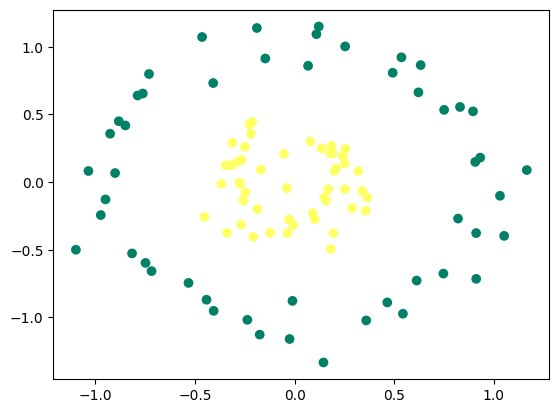

In [17]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X :', X.shape)
print('dimensions de y :', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 10000/10000 [00:15<00:00, 637.13it/s]


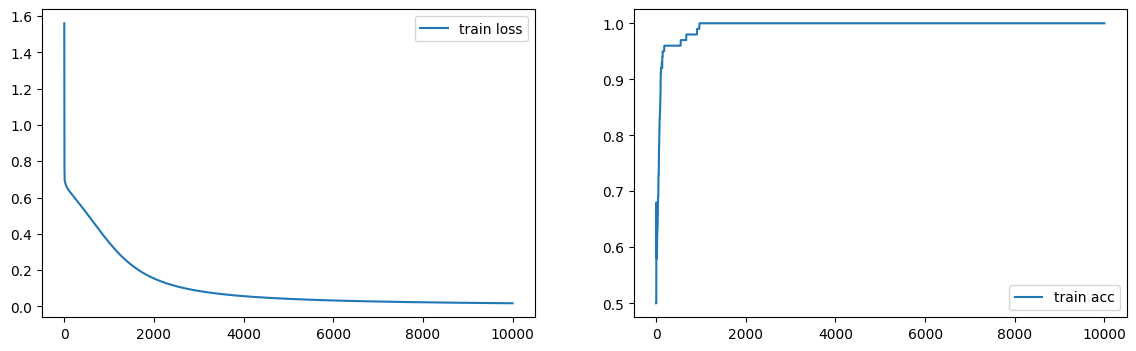

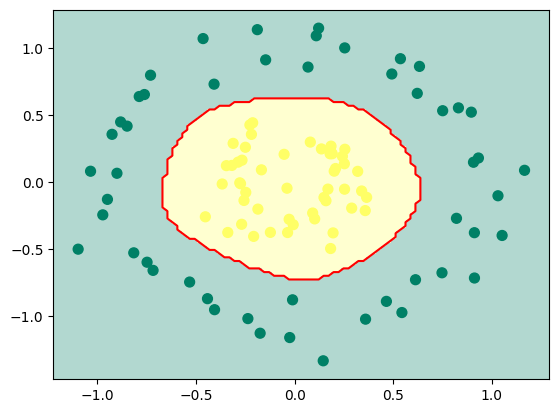

train accuracy : 1.0


In [21]:
parametres1 = neural_network1(X, y, n1=32, learning_rate = 0.1, n_iter = 10000)

100%|██████████| 8000/8000 [00:47<00:00, 168.85it/s]


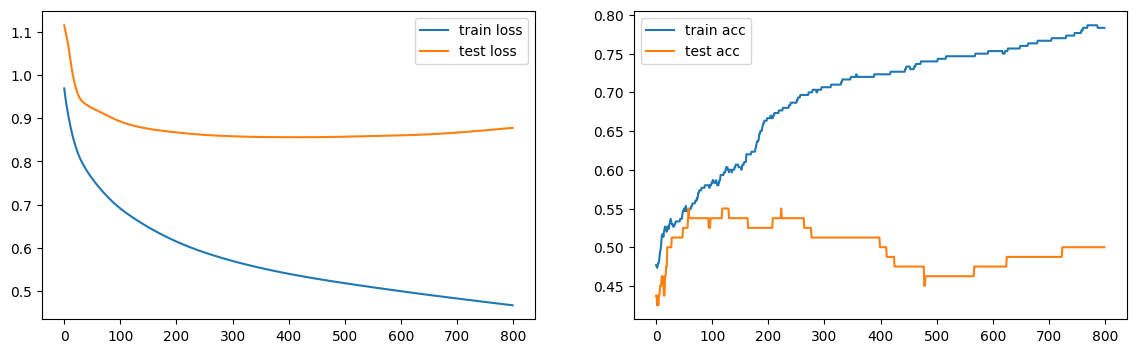

train accuracy : 0.7833333333333333
test accuracy : 0.5


In [19]:
parametres2 = neural_network2(X_train_reshape, y_train, X_test_reshape, y_test, n1=32)